# Fashion Boutique shopping trends analysis

#### Jayanand Hiremath

In [2]:
# Importing the required libraries for the project:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Begin with loading the dataset into the notebook:
shop_trend_df_v1 = pd.read_csv("D:/Spring 2025/data_analysis_project/fashion_boutique_analysis/shopping_trends.csv", index_col= 0) # (I avaoided importing the index column as I will not be using it).
shop_trend_df_v1.head(5)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Next is to identify count of records in each of these columns:
shop_trend_df_v1.count()

Age                         3900
Gender                      3900
Item Purchased              3900
Category                    3900
Purchase Amount (USD)       3900
Location                    3900
Size                        3900
Color                       3900
Season                      3900
Review Rating               3900
Subscription Status         3900
Payment Method              3900
Shipping Type               3900
Discount Applied            3900
Promo Code Used             3900
Previous Purchases          3900
Preferred Payment Method    3900
Frequency of Purchases      3900
dtype: int64

We see that all the columns contain 3900 records in each of these columns

In [5]:
# Even though we got that the count of each column is 3900 we will ensure there is no missing values:
shop_trend_df_v1.isnull().sum()

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

As we can see that there are no null or missing values in each of these columns. 

Let us consider if there were missing values, depending on the column we can employ different plans to fill these data or in some cases get rid of that records.
To identify suitable method to perform this data imputation we need to identify the data-types of each of these columns:

In [6]:
# Data-types of each of columns in the dataframe:
shop_trend_df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Code Us

From the datatypes detail above we can see that most of the data types are object (textual mostly) so when these columns face any missing values then these can be filled with most recurring or mode of the column (this is the easiest way of dealing with such columns). When we come to numerical columns we can go ahead and fill them out with averages or mean of the column (might not be the most perfect way but a good way nonetheless).

In [7]:
# Next we need to study the statistical attributes of the dataset:
shop_trend_df_v1.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


Numerical values statistics can be seen above

#### Visual EDA :

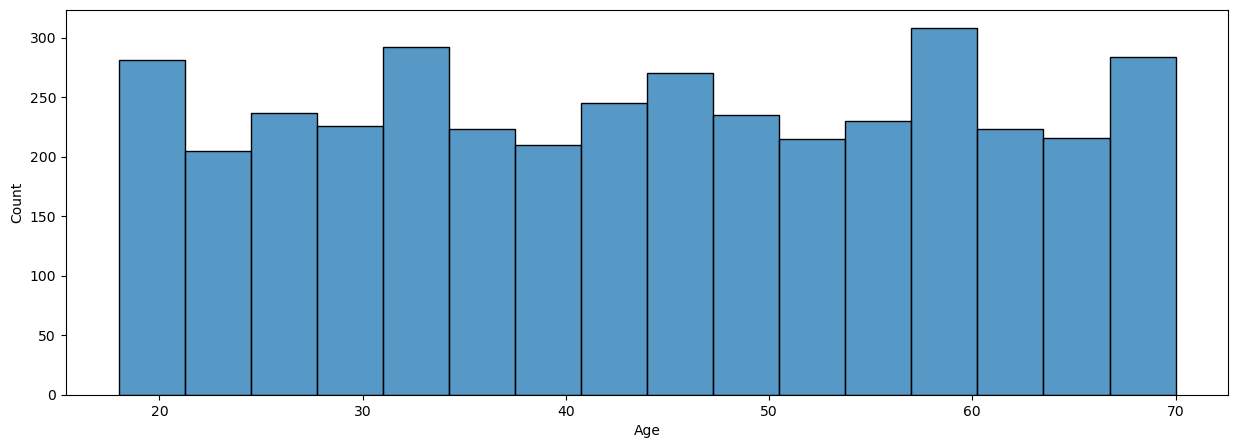

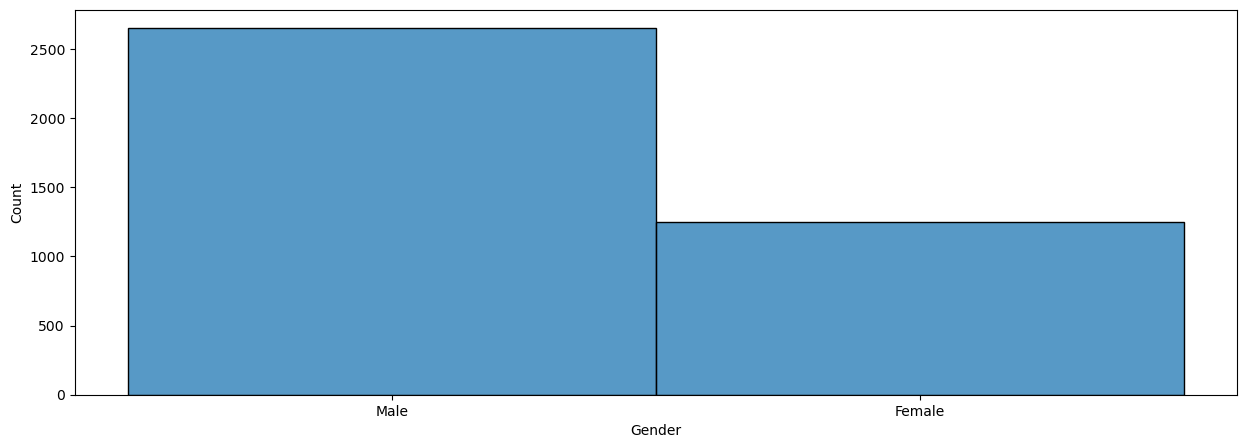

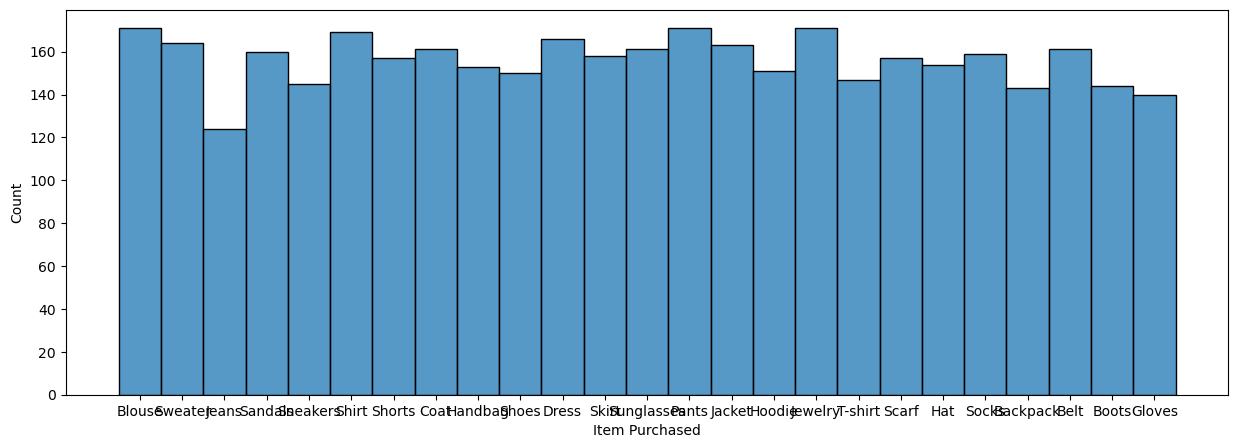

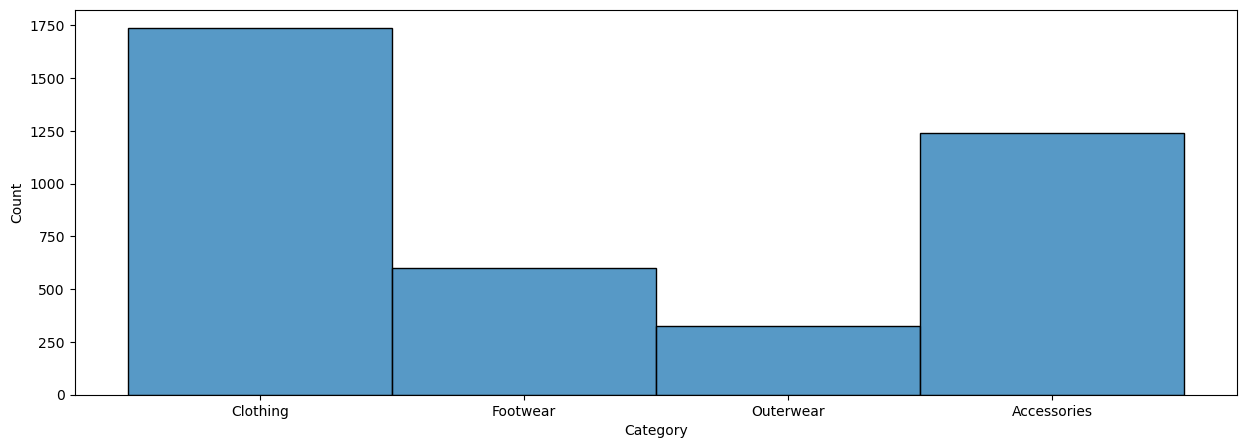

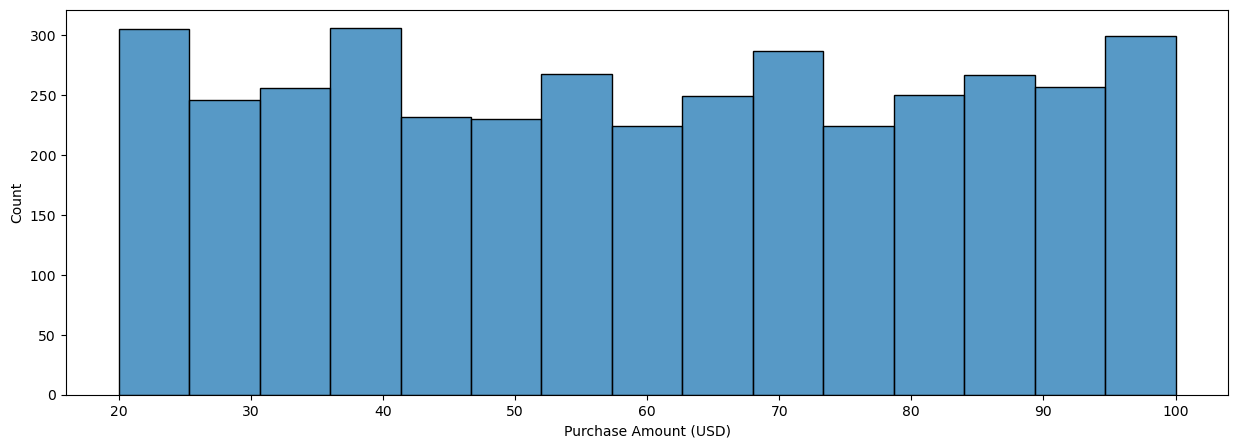

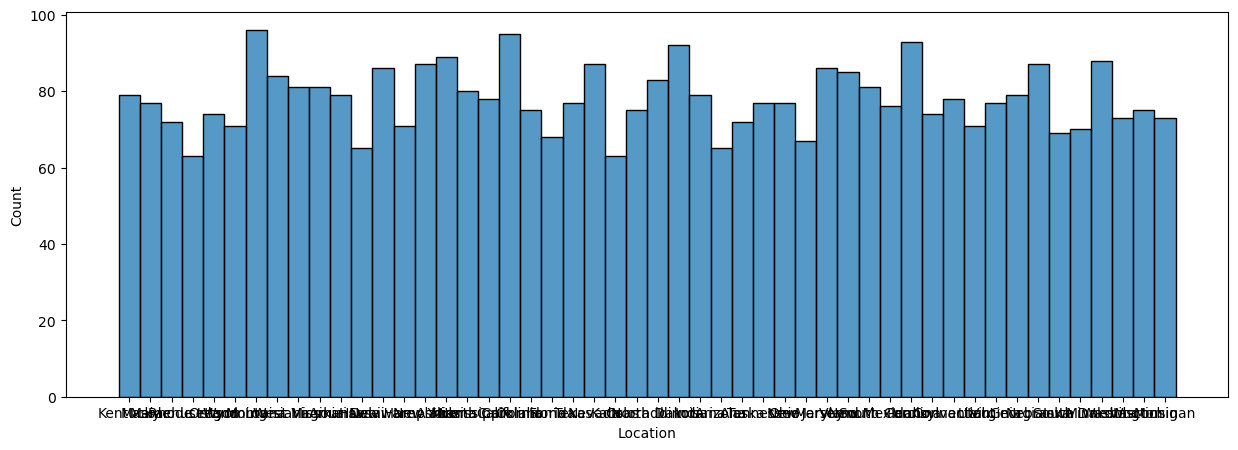

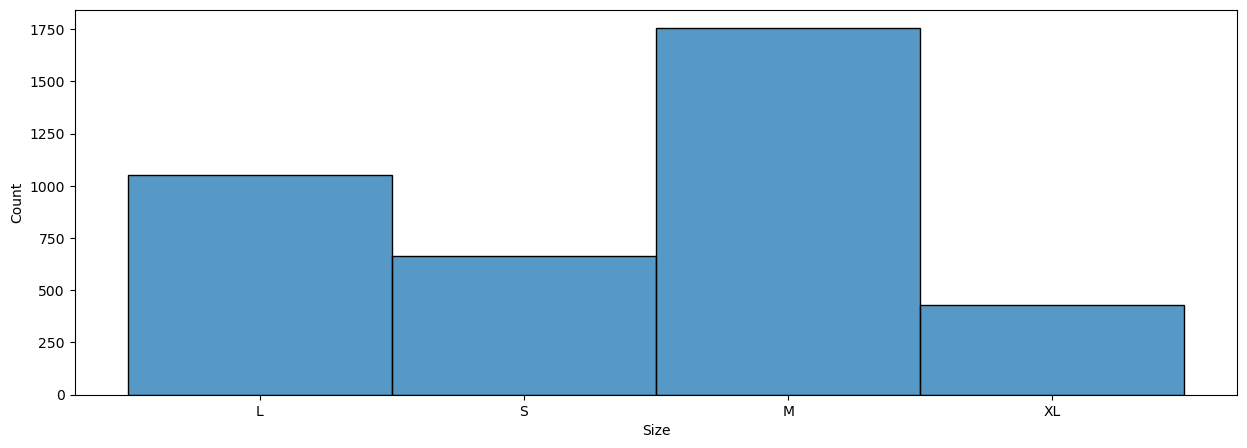

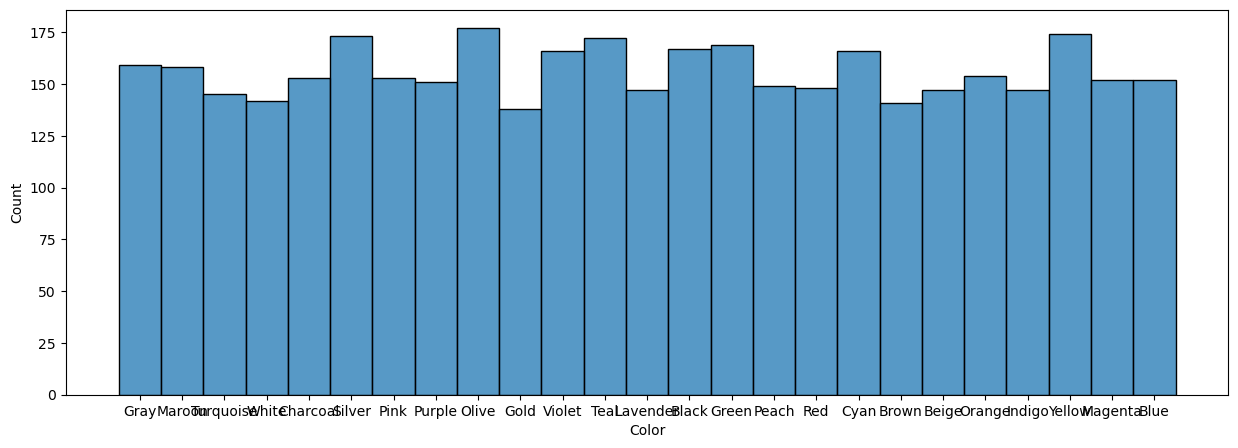

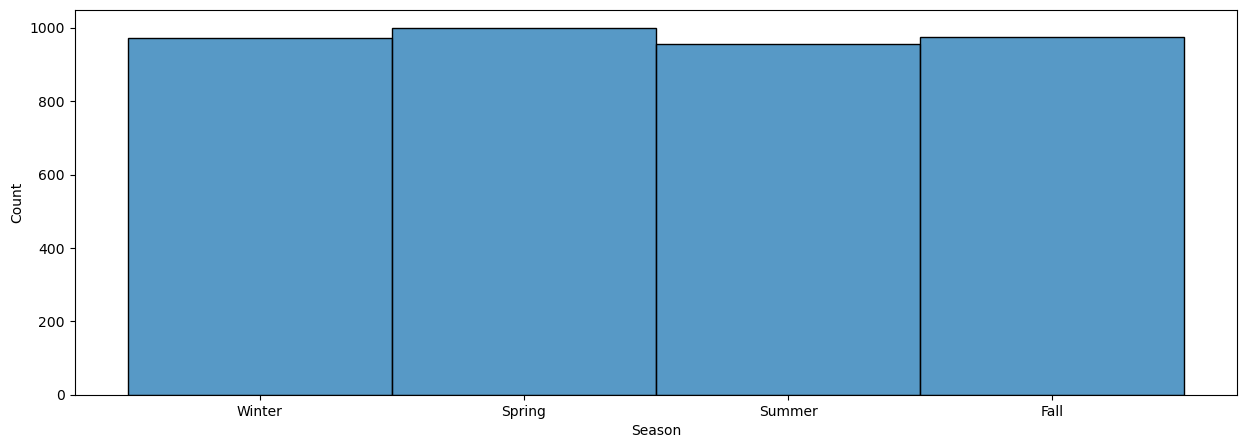

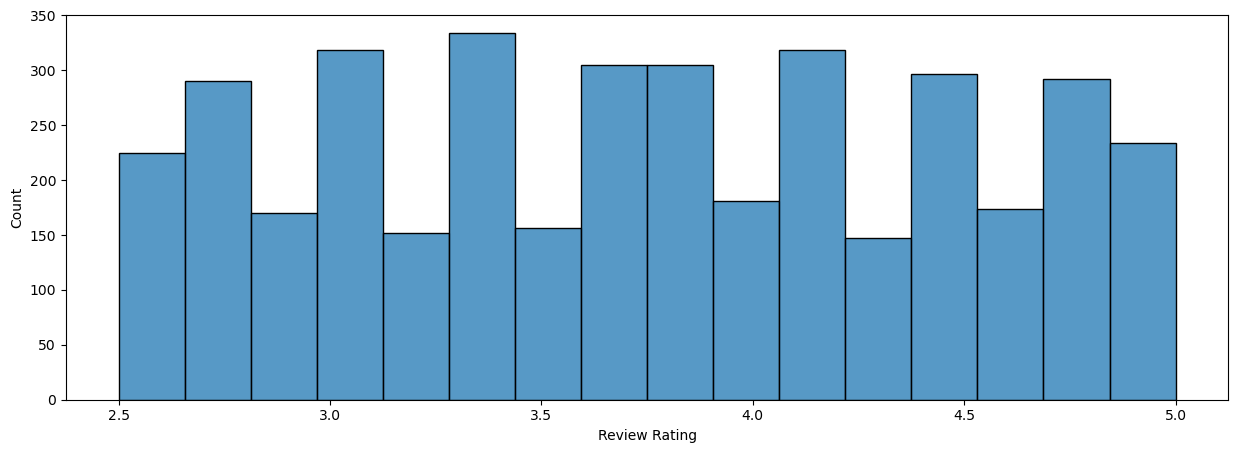

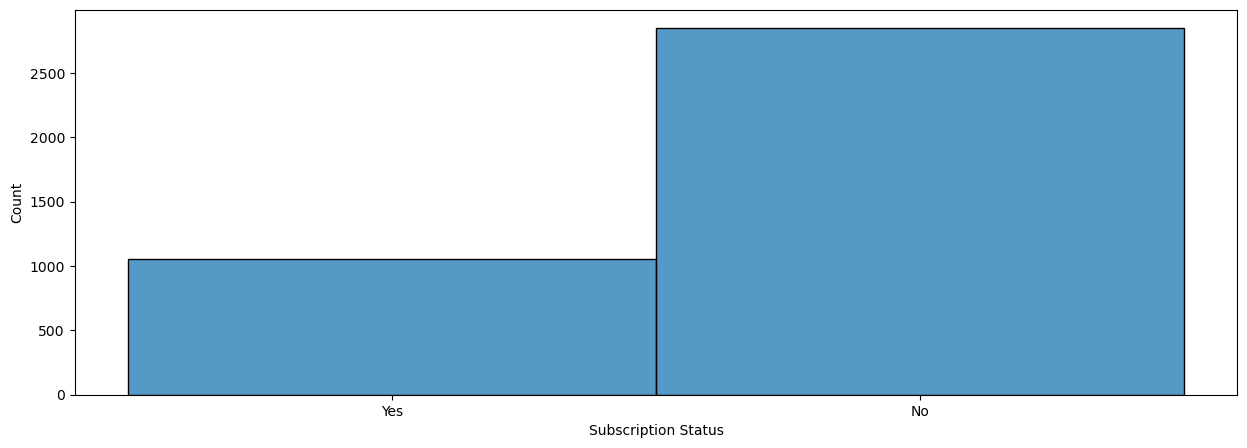

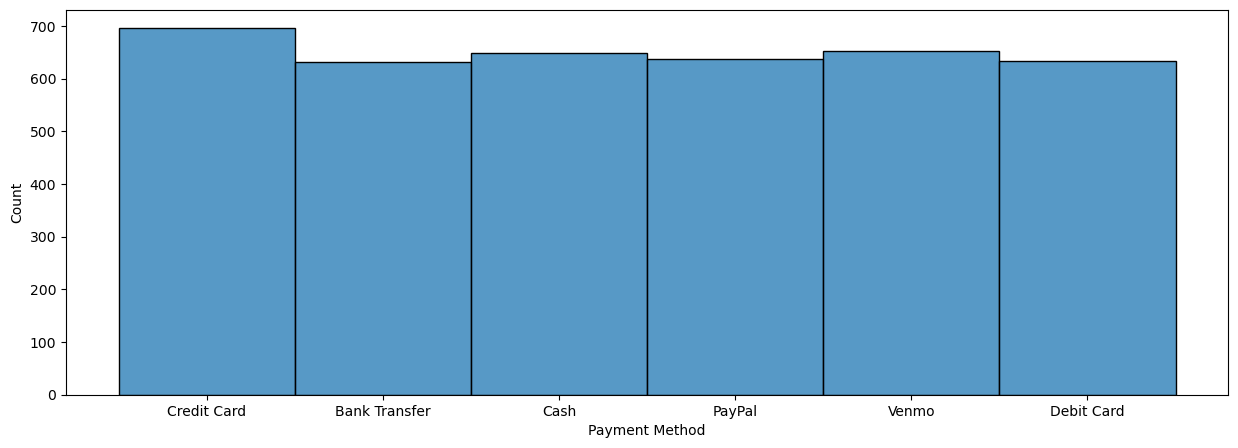

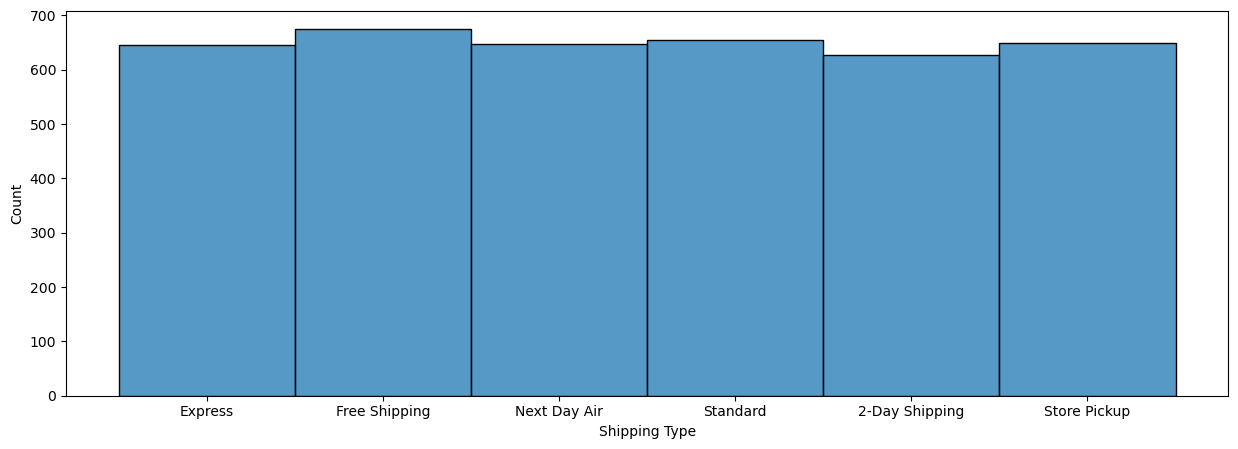

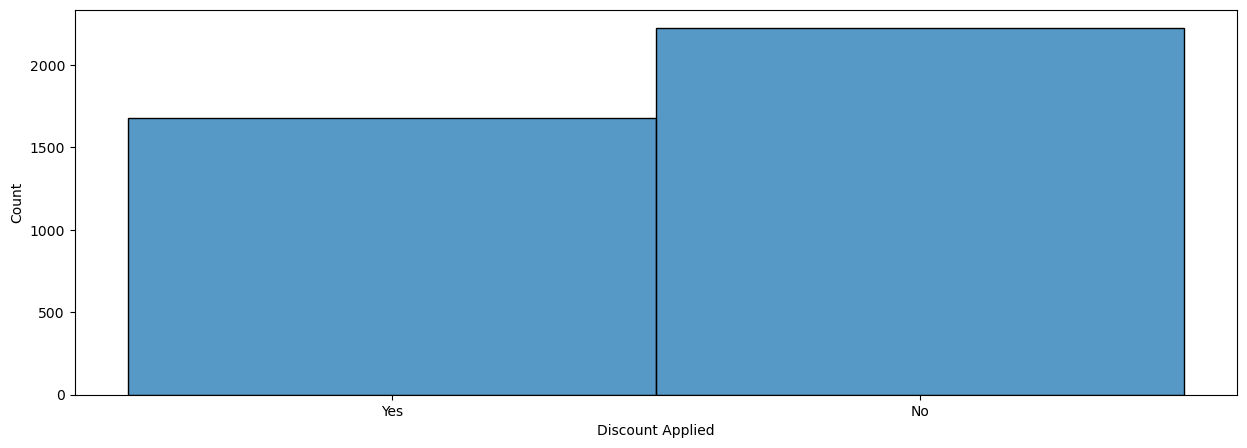

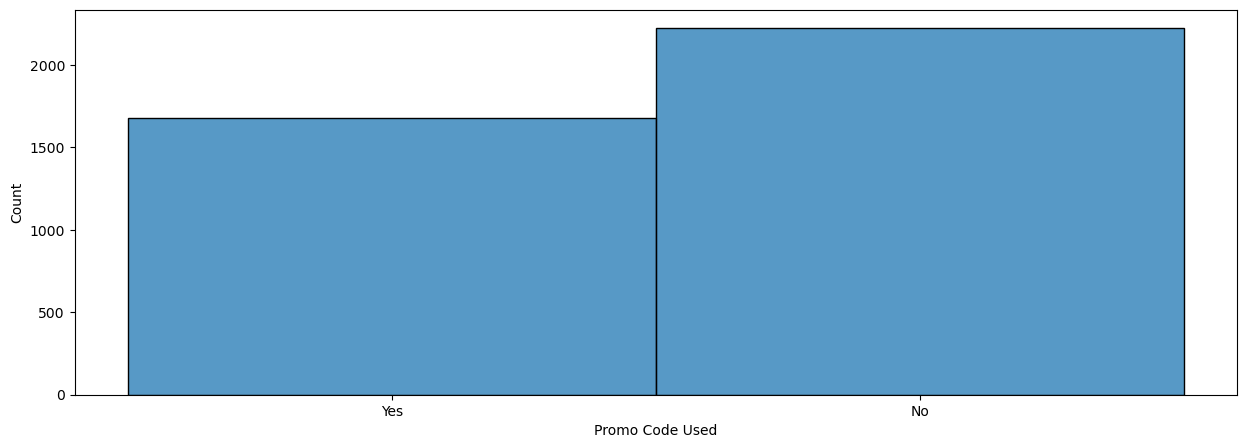

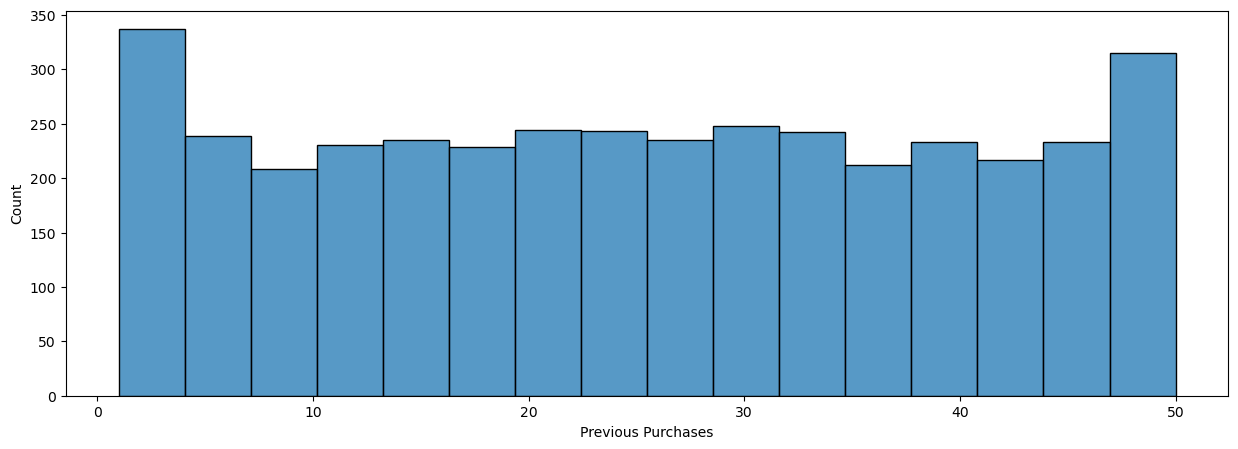

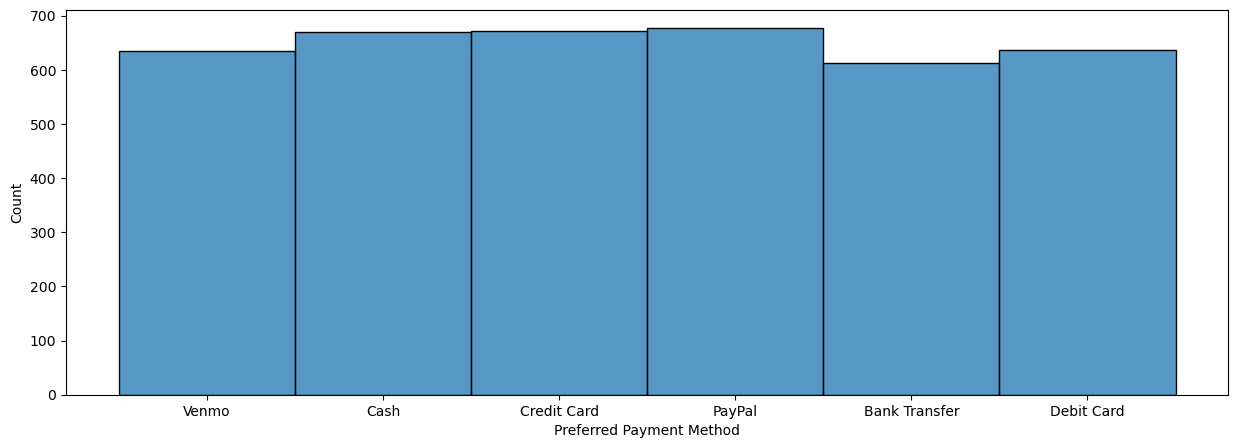

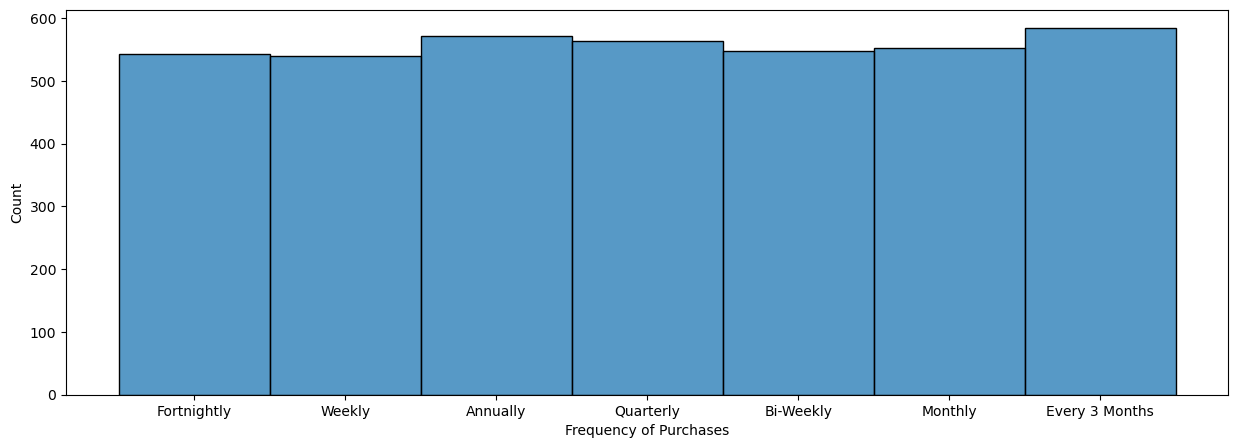

In [8]:
# Data distribution in each of these columns:
df_columns = shop_trend_df_v1.columns

for col in df_columns:
    plt.figure(figsize=(15,5))
    sns.histplot(shop_trend_df_v1[col])
    plt.show()


From the histoplots from above we can see that most of the data is distributes accross all the points.

#### Before I go ahead and create dashboard on Power BI I am trying to visualize the data here using seaborn and matplotlib. But I will be using MySQL to store this data first.

In [9]:
# Importing the mysql connector to connect with My-SQL DB:
import mysql.connector
# Importing SQL alchemy to create engine to add the dataframe into the Database:
from sqlalchemy import create_engine 

db_user = 'root'
db_password = 'admin123'
db_host = 'localhost'
db_name = 'analysis'

In [10]:
sql_engine = create_engine(f"mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}")

This is one way of adding the data into the SQL database. Other easy way is to add using the MySQL workbench data import wizard.

In [ ]:
query1 = 'CREATE TABLE shopping_trends (Age int, Gender text, Item Purchased text, Category text, Purchase Amount (USD) int, Location text, Size char(4), Color text, Season text, Review Rating double, Subscription Status text, Payment Method text, Shipping Type text, Discount Applied text, Promo Code Used text, Previous Purchases int, Preferred Payment Method text, Frequency of Purchases text)'

pd.read_sql(query1, con=sql_engine)

In [14]:
shop_trend_df_v1.to_sql(name='shopping_trends', con=sql_engine, if_exists='append', index=False)

3900